In [67]:
import pandas as pd
%matplotlib inline

In [2]:
sales_df =pd.read_csv("./PriceOptimizationc6dad82/TSC_Sales_Data.csv")

In [3]:
sales_df

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,20180402,1296,2,2.0,322.99,132.97
1,1,20181206,6878,1,1.0,322.99,132.97
2,1,20181210,7010,2,2.0,322.99,132.97
3,1,20190214,8380,2,1.0,322.99,132.97
4,1,20190502,10639,1,2.0,219.99,132.97
...,...,...,...,...,...,...,...
70824,97,20210728,70220,1,5.0,19.99,11.70
70825,97,20210728,70246,1,1.0,19.99,11.70
70826,97,20210729,70276,1,1.0,19.99,11.70
70827,97,20210729,70277,1,4.0,19.99,11.70


In [4]:
sales_df['TIME_DIM_KEY'] = pd.to_datetime(sales_df['TIME_DIM_KEY'],format = "%Y%m%d")

In [5]:
#sales_df['TIME_DIM_KEY'] = sales_df['TIME_DIM_KEY'].astype('object')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70829 entries, 0 to 70828
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SCRUB_ITEM      70829 non-null  int64         
 1   TIME_DIM_KEY    70829 non-null  datetime64[ns]
 2   SCRUB_TRANS_NO  70829 non-null  int64         
 3   TRANS_SEQ_NO    70829 non-null  int64         
 4   UNIT_QTY        70829 non-null  float64       
 5   UNIT_PRICE      70829 non-null  float64       
 6   UNIT_COST       70829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 3.8 MB


In [7]:
#sales_df['TIME_DIM_KEY'] = pd.to_datetime(sales_df['TIME_DIM_KEY'],format = '%Y%m%d')

In [23]:
sales_df.sort_values(by = )

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
52422,75,2018-01-01,1,1,1.0,1299.99,916.00
52423,75,2018-01-01,2,2,-1.0,1299.99,916.00
52424,75,2018-01-01,3,1,1.0,1039.99,916.00
52425,75,2018-01-01,4,2,-1.0,1039.99,916.00
22379,40,2018-01-02,10,1,1.0,39.99,23.75
...,...,...,...,...,...,...,...
60572,85,2021-08-06,70801,1,1.0,229.99,217.27
60573,85,2021-08-06,70803,1,1.0,229.99,217.27
60574,85,2021-08-06,70804,1,1.0,229.99,217.27
31172,44,2021-08-06,70824,1,1.0,379.99,249.04


In [9]:
price_df =pd.read_csv("./PriceOptimizationc6dad82/TSC_Price_Changes.csv")

In [10]:
price_df['PRICE_START_DATE'] = pd.to_datetime(price_df['PRICE_START_DATE'])#,format = "%Y%m%d")
#price_df['PRICE_END_DATE'] = pd.to_datetime(price_df['PRICE_END_DATE'])#,format = "%Y%m%d")

In [11]:
price_df['PRICE_END_DATE'] = pd.to_datetime(price_df['PRICE_END_DATE'],errors ='coerce')

In [12]:
price_df

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,2019-10-03,199.99
1,1,2019-10-04,2019-10-08,179.99
2,1,2019-10-09,2019-10-27,199.99
3,1,2019-10-28,2019-10-29,179.99
4,1,2019-10-30,2019-11-05,199.99
...,...,...,...,...
3881,97,2020-12-06,2020-12-07,19.99
3882,97,2020-12-08,2020-12-12,15.99
3883,97,2020-12-13,2020-12-18,15.99
3884,97,2020-12-19,2020-12-24,15.99


In [13]:
price_df['PRICE_END_DATE'].fillna('2030-01-01',inplace = True)

In [28]:
price_df.sort_values(by = 'PRICE_START_DATE',ascending = True)

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
1060,29,2018-01-22,2030-01-01,59.99
312,9,2018-02-08,2020-11-10,198.80
2660,63,2018-03-02,2020-01-25,189.99
2671,65,2018-05-18,2019-09-13,1199.99
1581,41,2018-07-31,2019-09-15,129.99
...,...,...,...,...
171,5,2021-08-02,2021-08-08,129.99
83,4,2021-08-04,2030-01-01,319.95
2691,67,2021-08-04,2030-01-01,249.99
609,18,2021-08-04,2030-01-01,199.99


In [15]:
price_df.sort_values(by = "PRICE_END_DATE",ascending = False)

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
372,11,2019-11-05,2030-01-01,519.99
3466,88,2021-01-11,2030-01-01,119.99
2587,59,2021-07-28,2030-01-01,174.99
60,2,2020-02-05,2030-01-01,14.99
2447,56,2021-01-11,2030-01-01,1099.99
...,...,...,...,...
3348,85,2019-09-10,2019-09-12,243.48
2692,68,2019-09-12,2019-09-12,117.54
1359,37,2019-09-12,2019-09-12,82.98
3160,80,2019-09-12,2019-09-12,127.49


In [16]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3886 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


In [17]:
comp_df =pd.read_csv("./PriceOptimizationc6dad82/Competitors_Price_Changes.csv")

In [32]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCAN_DATE_TIME               90953 non-null  object 
 1   SCRUB_ITEM                   90953 non-null  int64  
 2   SCRUB_COMPETITOR             90953 non-null  int64  
 3   TSC_PRICE                    90953 non-null  float64
 4   COMPETITOR_PRICE             90953 non-null  float64
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64
 6   COMPETITOR_SHIPPING          51396 non-null  float64
 7   COMPETITOR_REG_PRICE         90953 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.6+ MB


In [35]:
comp_df['SCAN_DATE_TIME'] = comp_df['SCAN_DATE_TIME'].str[:10]

In [38]:
comp_df['SCAN_DATE_TIME'] = pd.to_datetime(comp_df['SCAN_DATE_TIME'],format = "%Y-%m-%d")

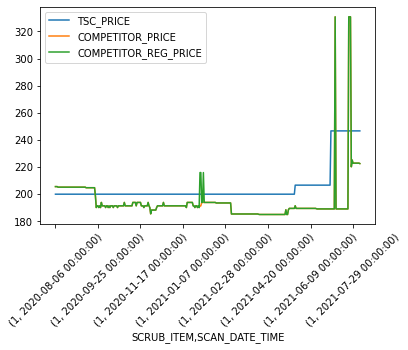

In [75]:
comp_df.groupby(['SCRUB_ITEM','SCAN_DATE_TIME'])[['TSC_PRICE','COMPETITOR_PRICE','COMPETITOR_REG_PRICE']].mean()[:359].plot(rot = 45);

In [39]:
comp_df.sort_values(by = 'SCAN_DATE_TIME',ascending = T)

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE
0,2020-08-06,1,1,199.99,205.58,102.7951,0.0,205.58
19093,2020-08-06,27,1,339.99,280.24,82.4259,0.0,280.24
19092,2020-08-06,27,1,349.99,280.24,80.0708,0.0,280.24
19091,2020-08-06,27,1,349.99,280.24,80.0708,0.0,280.24
53929,2020-08-06,63,1,189.99,306.83,161.4979,0.0,306.83
...,...,...,...,...,...,...,...,...
11387,2021-08-06,16,1,74.99,65.99,87.9983,NaN,65.99
11386,2021-08-06,16,1,59.99,65.99,110.0016,NaN,65.99
11385,2021-08-06,16,2,74.99,69.11,92.1589,0.0,69.11
16407,2021-08-06,23,3,379.99,388.58,102.2605,0.0,388.58


In [19]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCAN_DATE_TIME               90953 non-null  object 
 1   SCRUB_ITEM                   90953 non-null  int64  
 2   SCRUB_COMPETITOR             90953 non-null  int64  
 3   TSC_PRICE                    90953 non-null  float64
 4   COMPETITOR_PRICE             90953 non-null  float64
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64
 6   COMPETITOR_SHIPPING          51396 non-null  float64
 7   COMPETITOR_REG_PRICE         90953 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.6+ MB


In [20]:
import pandasql as ps

In [27]:
sqlcode = '''
select *
from sales_df
inner join price_df on sales_df.SCRUB_ITEM = price_df.SCRUB_ITEM
where sales_df.TIME_DIM_KEY >= price_df.PRICE_START_DATE and sales_df.TIME_DIM_KEY <= price_df.PRICE_END_DATE
'''

#group by sales_df.SCRUB_ITEM

newdf = ps.sqldf(sqlcode,locals())
newdf

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26 00:00:00.000000,13827,1,1.0,179.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
1,1,2019-09-20 00:00:00.000000,14984,1,2.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
2,1,2019-09-23 00:00:00.000000,15090,1,3.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
3,1,2019-09-24 00:00:00.000000,15218,1,1.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
4,1,2019-10-02 00:00:00.000000,15626,1,0.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28 00:00:00.000000,70220,1,5.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57146,97,2021-07-28 00:00:00.000000,70246,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57147,97,2021-07-29 00:00:00.000000,70276,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57148,97,2021-07-29 00:00:00.000000,70277,1,4.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99


In [29]:
newdf.to_csv("Price_and_sales",index = False)

In [22]:
sqlcode = '''
Select 

'''